# 文章生成

## RNNで文章生成

まずはRNNで文章を生成してみたいと思います。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('./deep-learning-from-scratch-2')
from ch07.rnnlm_gen import RnnlmGen
from dataset import ptb

In [2]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('./deep-learning-from-scratch-2/ch06/Rnnlm.pkl')

In [3]:
# start文字とskip文字の設定
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

In [4]:
# 文章生成
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you just have a big problem.
 james williams a trader at similar respective indexes and cold coping after question high standards.
 that 's resulted in the associates team 's new york kenneth yetnikoff in the ana indicted american ad language traditionally break fax and funded relationships routinely as a friend.
 your season was growing for eugene venture.
 at san diego 's case these kind of soviet accessible will have t. easy.
 it explained instead of what he told the little needed its market warnings replace that costs and put them into the the computers and


**Google翻訳**  
あなたには大きな問題があります。  
ジェームス・ウィリアムズは、同様のそれぞれのインデックスとコールド・コーピングで、高い基準を疑問視した上でトレーダーを務めています。  
その結果、アソシエイトチームのニューヨークでのケネストは、伝統的にファックスやファンドの関係を日常的に友人として壊していた。  
あなたの季節はユージンのベンチャーのために成長していました。  
サンディエゴの場合、これらの種類のアクセス可能なソヴィエトは、 簡単です。  
市場の警告がその費用を置き換えてコンピュータやコンピュータに入れる必要があると少し話したのではなく説明した

最初の文はよくできていますが、後半の方は理解できる文章になっていません。

## より良いモデル

先ほどの文章生成はまだまだ精度が低いので、精度をあげるようモデルを改良して文章生成を行なってみます。

In [5]:
from ch07.rnnlm_gen import BetterRnnlmGen

In [6]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)


model = BetterRnnlmGen()
model.load_params('./deep-learning-from-scratch-2/ch06/BetterRnnlm.pkl')

In [7]:
# start文字とskip文字の設定
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 文章生成
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print(txt)

you were under only a view of the boom.
 in the aftermath of the glare of lending or ignorance these measurements probably are needed because of the quake.
 it revealed that defective drug problems occur after an initial u.s. postal supervision who angry the past week.
 in this context they charge a two-day meeting in new york city where inflation is too high.
 but not ernst & hills co. the initial sample of aids to wish as much as much as low as the painting seen as some people really think.
 as one copy of


**Google翻訳**  
あなたはブームの唯一の見通しの下にいました。  
貸し出しや無知の眩しさの余波の後で、おそらくこの地震のためにこれらの測定が必要になるでしょう。  
それは最初の米国の後に欠陥のある薬物問題が発生することを明らかにした。 先週、怒っていた郵便監督。  
この文脈では、インフレ率が高すぎるニューヨーク市で2日間の会議を開催します。  
エルンスト＆ヒルズの共同会社ではありません。 いくつかの人々が本当に思っているように見える絵画と同じくらい低いものを望む援助の最初のサンプルです。  
1つのコピーとして

In [8]:
model.reset_state()

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

the meaning of life is rising.
 such a concrete case is crushed by the heart of the society which is stuart who now is the sole vacated in a series of issues by americans and will prohibit whatever a musicians such as retirement.
 they 're trying to submit associates mr. interest does n't return in any guidelines with any legislative wars.
 one black senator and other york lawyer david s. angelo extended she is skeptical and improperly a magazine was the billionaire using it.
 south gardens ad rose to end the company.
 four years ago the company was awaiting


**Google翻訳**  
人生の意味が高まっています。  
このような具体的な事件は、アメリカ人による一連の問題の中で唯一空いているスチュアートであり、退職などのミュージシャンが何であれ禁止している社会の心臓部に押しつぶされている。  
彼らは仲間を提出しようとしています。 法律上の戦争のあるガイドラインに関心は戻っていません。  
黒人の上院議員と他の弁護士のダヴィドの弁護士。 彼女は懐疑的であり、不適切に雑誌はそれを使っている億万長者だった。  
南庭園の広告は会社を終了するために上昇した。  
4年前に同社は待っていた

学習済みの重みを用いて学習を行なったところ、先ほどのモデルよりは精度が高いように思います。  
ただ、まだまだ文章の意味は理解できないので、もっと長い文章データで学習をさせるか、さらなるモデルの改良をすることで、  
精度を高めていく必要がありそうです。

# Seq2seqとは？

簡単に言うと、語句の並びを入力して、別の語句の並びに変換する際のルールを学習する手法のことを言います。  
例えば、機械翻訳に応用すると、日本語を英語に翻訳したり、英語を日本語に翻訳したりすることが可能になります。  
Google翻訳もこのSeq2seqを使っています。  
他には対話型ロボットやチャットボット、メールの自動返信などにもSeq2seqが使われています。

機械学習では、「語句の並び」は数値（ベクトル）に変換されるため、これを応用し、語句の並びの代わりに画像を入力して、  
語句の並びを出力する（画像の説明を作成する）というルールも学習できます。

Seq2seqは**Encoder**と**Decoder**に分かれており、  
Encoderで入力データをエンコード（データの変換）し、Decoderでエンコードしたデータをエンコードされる前のデータに戻すということを行います。  

機械翻訳で言うと、日本語の入力をベクトルの数値データにエンコード（変換）し、特徴を抽出します。  
その後、そのエンコードされたデータをベクトルから言語にデコードすれば、その出力が英語になっていたりするわけです。

# 足し算データセット

Seq2seqは固定長のベクトルを扱いますが、時系列データには可変長のベクトルも存在します。  
そこで、paddingを使って、一番多い文字数の固定長ベクトルに統一して学習を行います。  
文字数が足りないところは空白などの意味のないデータで埋めます。  
例として、足し算のデータセットを作成します。

In [9]:
from dataset import sequence

In [10]:
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()
print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)


In [11]:
print(x_train[0])
print(t_train[0])

[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]


In [12]:
print(' '.join([id_to_char[c] for c in x_train[0]]))
print(' '.join([id_to_char[c] for c in t_train[0]]))

7 1 + 1 1 8  
_ 1 8 9  


# 実装

## Encoder

In [ ]:
class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        
        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)
        
        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        self.hs = None
        
    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        self.hs = hs
        return hs[:, -1, :]
    
    def backward(self, dh):
        dhs = np.zeros_like(self.hs)
        dhs[:, -1, :] = dh
        
        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dhs)
        return dout

## Decoder

In [ ]:
class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        embed_W = (rn(V, D) / 100).astype('f')
        lstm.Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm.Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm.b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')
        
        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm.Wx, lstm.Wh, lstm.b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)
        
        self.params, self.grads = [], []
        
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
            
    def forward(self, xs, h):
        self.lstm.set_state(h)
        
        out = self.embed.forward(xs)
        out = self.lstm.forward(out)
        score = self.affine.forward(out)
        return score
    
    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.lstm.dh
        return dh
    
    def generate(self, h, start_id, sample_size):
        sampled = []
        sampled_id = start_id
        self.lstm.set_state(h)
        
        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1, 1))
            out = self.embed.forward(x)
            out = self.lstm.forward(out)
            score = self.affine.forward(out)
            
            sample_id = np.argmax(score.flatten())
            sampled.append(int(sample_id))
            
        return sampled

## Seq2seq

In [ ]:
class Seq2seq(BaseModel):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = Decoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()
        
        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads
        
    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]
        
        h = self.encoder.forward(xs)
        score = self.decoder(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss
    
    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout
    
    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, stard_id, sample_size)
        return sampled

# 学習

In [13]:
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq

In [14]:
# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

In [15]:
model = Seq2seq(vocab_size, wordvec_size, hideen_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

In [16]:
acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 0[s] | loss 2.53
| epoch 1 |  iter 41 / 351 | time 1[s] | loss 2.17
| epoch 1 |  iter 61 / 351 | time 1[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 2[s] | loss 1.92
| epoch 1 |  iter 101 / 351 | time 2[s] | loss 1.87
| epoch 1 |  iter 121 / 351 | time 3[s] | loss 1.85
| epoch 1 |  iter 141 / 351 | time 3[s] | loss 1.83
| epoch 1 |  iter 161 / 351 | time 4[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 4[s] | loss 1.77
| epoch 1 |  iter 201 / 351 | time 5[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 5[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 6[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 6[s] | loss 1.76
| epoch 1 |  iter 281 / 351 | time 7[s] | loss 1.75
| epoch 1 |  iter 301 / 351 | time 7[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 8[s] | loss 1.75
| epoch 1 |  iter 341 / 351 | time 8[s] | loss 1.74
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 66

| epoch 7 |  iter 121 / 351 | time 2[s] | loss 1.08
| epoch 7 |  iter 141 / 351 | time 3[s] | loss 1.08
| epoch 7 |  iter 161 / 351 | time 3[s] | loss 1.09
| epoch 7 |  iter 181 / 351 | time 4[s] | loss 1.09
| epoch 7 |  iter 201 / 351 | time 4[s] | loss 1.08
| epoch 7 |  iter 221 / 351 | time 5[s] | loss 1.07
| epoch 7 |  iter 241 / 351 | time 5[s] | loss 1.06
| epoch 7 |  iter 261 / 351 | time 6[s] | loss 1.06
| epoch 7 |  iter 281 / 351 | time 6[s] | loss 1.07
| epoch 7 |  iter 301 / 351 | time 7[s] | loss 1.07
| epoch 7 |  iter 321 / 351 | time 7[s] | loss 1.04
| epoch 7 |  iter 341 / 351 | time 7[s] | loss 1.04
Q 77+85  
T 162 
☒ 156 
---
Q 975+164
T 1139
☒ 1160
---
Q 582+84 
T 666 
☒ 658 
---
Q 8+155  
T 163 
☒ 148 
---
Q 367+55 
T 422 
☒ 409 
---
Q 600+257
T 857 
☑ 857 
---
Q 761+292
T 1053
☒ 1046
---
Q 830+597
T 1427
☒ 1409
---
Q 26+838 
T 864 
☒ 854 
---
Q 143+93 
T 236 
☒ 227 
---
val acc 3.680%
| epoch 8 |  iter 1 / 351 | time 0[s] | loss 1.04
| epoch 8 |  iter 21 / 351 | ti

| epoch 13 |  iter 221 / 351 | time 5[s] | loss 0.92
| epoch 13 |  iter 241 / 351 | time 5[s] | loss 0.88
| epoch 13 |  iter 261 / 351 | time 5[s] | loss 0.89
| epoch 13 |  iter 281 / 351 | time 6[s] | loss 0.92
| epoch 13 |  iter 301 / 351 | time 6[s] | loss 0.91
| epoch 13 |  iter 321 / 351 | time 7[s] | loss 0.92
| epoch 13 |  iter 341 / 351 | time 8[s] | loss 0.92
Q 77+85  
T 162 
☒ 164 
---
Q 975+164
T 1139
☑ 1139
---
Q 582+84 
T 666 
☒ 669 
---
Q 8+155  
T 163 
☒ 167 
---
Q 367+55 
T 422 
☒ 434 
---
Q 600+257
T 857 
☒ 859 
---
Q 761+292
T 1053
☒ 1049
---
Q 830+597
T 1427
☒ 1404
---
Q 26+838 
T 864 
☒ 869 
---
Q 143+93 
T 236 
☒ 246 
---
val acc 5.760%
| epoch 14 |  iter 1 / 351 | time 0[s] | loss 0.92
| epoch 14 |  iter 21 / 351 | time 0[s] | loss 0.92
| epoch 14 |  iter 41 / 351 | time 0[s] | loss 0.91
| epoch 14 |  iter 61 / 351 | time 1[s] | loss 0.91
| epoch 14 |  iter 81 / 351 | time 1[s] | loss 0.89
| epoch 14 |  iter 101 / 351 | time 2[s] | loss 0.90
| epoch 14 |  iter 121

| epoch 19 |  iter 301 / 351 | time 7[s] | loss 0.81
| epoch 19 |  iter 321 / 351 | time 8[s] | loss 0.81
| epoch 19 |  iter 341 / 351 | time 8[s] | loss 0.87
Q 77+85  
T 162 
☒ 164 
---
Q 975+164
T 1139
☒ 1162
---
Q 582+84 
T 666 
☒ 672 
---
Q 8+155  
T 163 
☒ 162 
---
Q 367+55 
T 422 
☒ 427 
---
Q 600+257
T 857 
☒ 856 
---
Q 761+292
T 1053
☒ 1049
---
Q 830+597
T 1427
☒ 1424
---
Q 26+838 
T 864 
☒ 862 
---
Q 143+93 
T 236 
☒ 237 
---
val acc 10.000%
| epoch 20 |  iter 1 / 351 | time 0[s] | loss 0.80
| epoch 20 |  iter 21 / 351 | time 0[s] | loss 0.80
| epoch 20 |  iter 41 / 351 | time 0[s] | loss 0.82
| epoch 20 |  iter 61 / 351 | time 1[s] | loss 0.81
| epoch 20 |  iter 81 / 351 | time 1[s] | loss 0.81
| epoch 20 |  iter 101 / 351 | time 2[s] | loss 0.82
| epoch 20 |  iter 121 / 351 | time 2[s] | loss 0.82
| epoch 20 |  iter 141 / 351 | time 3[s] | loss 0.80
| epoch 20 |  iter 161 / 351 | time 3[s] | loss 0.83
| epoch 20 |  iter 181 / 351 | time 4[s] | loss 0.86
| epoch 20 |  iter 20

val acc 10.320%


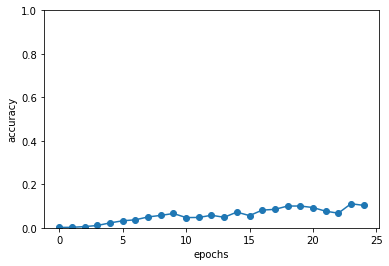

In [17]:
# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()

25エポック学習を行いましたが、accuracyが10%程度とかなり低いです。  
ここからSeq2seqの改良を行なっていきたいと思います。

# Seq2seqの改良

## 入力データの反転

In [23]:
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt', seed=1984)
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
char_to_id, id_to_char = sequence.get_vocab()

In [24]:
# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

In [25]:
model = Seq2seq(vocab_size, wordvec_size, hideen_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

In [26]:
y_acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)

    acc = float(correct_num) / len(x_test)
    y_acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 0[s] | loss 2.52
| epoch 1 |  iter 41 / 351 | time 1[s] | loss 2.17
| epoch 1 |  iter 61 / 351 | time 1[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 2[s] | loss 1.91
| epoch 1 |  iter 101 / 351 | time 2[s] | loss 1.87
| epoch 1 |  iter 121 / 351 | time 2[s] | loss 1.86
| epoch 1 |  iter 141 / 351 | time 3[s] | loss 1.84
| epoch 1 |  iter 161 / 351 | time 3[s] | loss 1.80
| epoch 1 |  iter 181 / 351 | time 4[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 4[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 5[s] | loss 1.77
| epoch 1 |  iter 241 / 351 | time 5[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 6[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 6[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 7[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 7[s] | loss 1.74
| epoch 1 |  iter 341 / 351 | time 8[s] | loss 1.73
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1000
---
Q  48+285
T 66

| epoch 7 |  iter 121 / 351 | time 2[s] | loss 0.67
| epoch 7 |  iter 141 / 351 | time 3[s] | loss 0.67
| epoch 7 |  iter 161 / 351 | time 3[s] | loss 0.67
| epoch 7 |  iter 181 / 351 | time 4[s] | loss 0.66
| epoch 7 |  iter 201 / 351 | time 4[s] | loss 0.66
| epoch 7 |  iter 221 / 351 | time 4[s] | loss 0.66
| epoch 7 |  iter 241 / 351 | time 5[s] | loss 0.64
| epoch 7 |  iter 261 / 351 | time 5[s] | loss 0.65
| epoch 7 |  iter 281 / 351 | time 6[s] | loss 0.64
| epoch 7 |  iter 301 / 351 | time 6[s] | loss 0.63
| epoch 7 |  iter 321 / 351 | time 7[s] | loss 0.63
| epoch 7 |  iter 341 / 351 | time 7[s] | loss 0.62
Q   58+77
T 162 
☑ 162 
---
Q 461+579
T 1139
☒ 1142
---
Q  48+285
T 666 
☑ 666 
---
Q   551+8
T 163 
☒ 162 
---
Q  55+763
T 422 
☑ 422 
---
Q 752+006
T 857 
☒ 859 
---
Q 292+167
T 1053
☒ 1144
---
Q 795+038
T 1427
☒ 1431
---
Q  838+62
T 864 
☒ 866 
---
Q  39+341
T 236 
☒ 239 
---
val acc 17.500%
| epoch 8 |  iter 1 / 351 | time 0[s] | loss 0.66
| epoch 8 |  iter 21 / 351 | t

| epoch 13 |  iter 221 / 351 | time 5[s] | loss 0.43
| epoch 13 |  iter 241 / 351 | time 5[s] | loss 0.43
| epoch 13 |  iter 261 / 351 | time 5[s] | loss 0.41
| epoch 13 |  iter 281 / 351 | time 6[s] | loss 0.42
| epoch 13 |  iter 301 / 351 | time 6[s] | loss 0.41
| epoch 13 |  iter 321 / 351 | time 7[s] | loss 0.43
| epoch 13 |  iter 341 / 351 | time 7[s] | loss 0.40
Q   58+77
T 162 
☑ 162 
---
Q 461+579
T 1139
☒ 1140
---
Q  48+285
T 666 
☑ 666 
---
Q   551+8
T 163 
☒ 162 
---
Q  55+763
T 422 
☒ 424 
---
Q 752+006
T 857 
☒ 856 
---
Q 292+167
T 1053
☒ 1054
---
Q 795+038
T 1427
☒ 1429
---
Q  838+62
T 864 
☑ 864 
---
Q  39+341
T 236 
☒ 239 
---
val acc 39.420%
| epoch 14 |  iter 1 / 351 | time 0[s] | loss 0.41
| epoch 14 |  iter 21 / 351 | time 0[s] | loss 0.41
| epoch 14 |  iter 41 / 351 | time 0[s] | loss 0.41
| epoch 14 |  iter 61 / 351 | time 1[s] | loss 0.40
| epoch 14 |  iter 81 / 351 | time 1[s] | loss 0.40
| epoch 14 |  iter 101 / 351 | time 2[s] | loss 0.41
| epoch 14 |  iter 12

| epoch 19 |  iter 301 / 351 | time 7[s] | loss 0.32
| epoch 19 |  iter 321 / 351 | time 7[s] | loss 0.33
| epoch 19 |  iter 341 / 351 | time 8[s] | loss 0.33
Q   58+77
T 162 
☒ 161 
---
Q 461+579
T 1139
☒ 1140
---
Q  48+285
T 666 
☑ 666 
---
Q   551+8
T 163 
☑ 163 
---
Q  55+763
T 422 
☑ 422 
---
Q 752+006
T 857 
☒ 858 
---
Q 292+167
T 1053
☒ 1052
---
Q 795+038
T 1427
☒ 1430
---
Q  838+62
T 864 
☑ 864 
---
Q  39+341
T 236 
☒ 238 
---
val acc 47.560%
| epoch 20 |  iter 1 / 351 | time 0[s] | loss 0.32
| epoch 20 |  iter 21 / 351 | time 0[s] | loss 0.35
| epoch 20 |  iter 41 / 351 | time 0[s] | loss 0.33
| epoch 20 |  iter 61 / 351 | time 1[s] | loss 0.33
| epoch 20 |  iter 81 / 351 | time 1[s] | loss 0.31
| epoch 20 |  iter 101 / 351 | time 2[s] | loss 0.31
| epoch 20 |  iter 121 / 351 | time 2[s] | loss 0.33
| epoch 20 |  iter 141 / 351 | time 3[s] | loss 0.32
| epoch 20 |  iter 161 / 351 | time 3[s] | loss 0.33
| epoch 20 |  iter 181 / 351 | time 4[s] | loss 0.31
| epoch 20 |  iter 20

val acc 54.240%


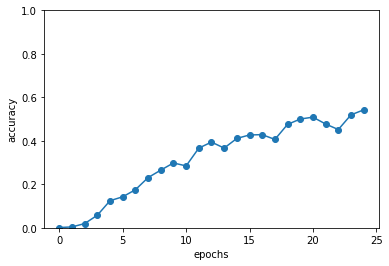

In [28]:
# グラフの描画
y = np.arange(len(y_acc_list))
plt.plot(y, y_acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()

理論的にはわかっていないようですが、入力データを反転させるだけで学習効率が上がルことが分かります。  

## 覗き見（Peeky）

Encoderから出力される隠れ情報（h）をDecoderの全てのレイヤに与えて学習させると学習効率が上がります。

In [ ]:
class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f')
        affine_b = np.zeros(V).astype('f')
        
        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)
        
        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None
        
    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape
        
        self.lstm.set_state(h)
        
        out = self.embed.forward(xs)
        hs = np.repeat(h, T, axis=0).reshape(N, T, H)
        out = np.concatenate((hs, out), axis=2)
        
        out = self.lstm.forward(out)
        out = np.concatenate((hs, out), axis=2)
        
        score = self.affine.forward(out)
        self.cache = H
        return score
        
    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)

        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled

In [ ]:
class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

入力データは反転したデータを使用して学習を行います。

In [29]:
# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

In [30]:
model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

In [31]:
z_acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)

    acc = float(correct_num) / len(x_test)
    z_acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 0[s] | loss 2.47
| epoch 1 |  iter 41 / 351 | time 1[s] | loss 2.16
| epoch 1 |  iter 61 / 351 | time 1[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 2[s] | loss 1.91
| epoch 1 |  iter 101 / 351 | time 2[s] | loss 1.83
| epoch 1 |  iter 121 / 351 | time 3[s] | loss 1.81
| epoch 1 |  iter 141 / 351 | time 3[s] | loss 1.79
| epoch 1 |  iter 161 / 351 | time 4[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 4[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 5[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 5[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 6[s] | loss 1.77
| epoch 1 |  iter 261 / 351 | time 6[s] | loss 1.76
| epoch 1 |  iter 281 / 351 | time 7[s] | loss 1.76
| epoch 1 |  iter 301 / 351 | time 7[s] | loss 1.75
| epoch 1 |  iter 321 / 351 | time 8[s] | loss 1.75
| epoch 1 |  iter 341 / 351 | time 8[s] | loss 1.74
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1010
---
Q  48+285
T 66

| epoch 7 |  iter 121 / 351 | time 3[s] | loss 0.38
| epoch 7 |  iter 141 / 351 | time 3[s] | loss 0.37
| epoch 7 |  iter 161 / 351 | time 4[s] | loss 0.36
| epoch 7 |  iter 181 / 351 | time 4[s] | loss 0.35
| epoch 7 |  iter 201 / 351 | time 5[s] | loss 0.33
| epoch 7 |  iter 221 / 351 | time 5[s] | loss 0.32
| epoch 7 |  iter 241 / 351 | time 6[s] | loss 0.31
| epoch 7 |  iter 261 / 351 | time 6[s] | loss 0.30
| epoch 7 |  iter 281 / 351 | time 7[s] | loss 0.29
| epoch 7 |  iter 301 / 351 | time 7[s] | loss 0.28
| epoch 7 |  iter 321 / 351 | time 8[s] | loss 0.28
| epoch 7 |  iter 341 / 351 | time 8[s] | loss 0.26
Q   58+77
T 162 
☑ 162 
---
Q 461+579
T 1139
☒ 1149
---
Q  48+285
T 666 
☑ 666 
---
Q   551+8
T 163 
☑ 163 
---
Q  55+763
T 422 
☑ 422 
---
Q 752+006
T 857 
☒ 767 
---
Q 292+167
T 1053
☑ 1053
---
Q 795+038
T 1427
☑ 1427
---
Q  838+62
T 864 
☑ 864 
---
Q  39+341
T 236 
☑ 236 
---
val acc 76.860%
| epoch 8 |  iter 1 / 351 | time 0[s] | loss 0.24
| epoch 8 |  iter 21 / 351 | t

| epoch 13 |  iter 221 / 351 | time 5[s] | loss 0.04
| epoch 13 |  iter 241 / 351 | time 6[s] | loss 0.04
| epoch 13 |  iter 261 / 351 | time 6[s] | loss 0.04
| epoch 13 |  iter 281 / 351 | time 7[s] | loss 0.03
| epoch 13 |  iter 301 / 351 | time 7[s] | loss 0.04
| epoch 13 |  iter 321 / 351 | time 8[s] | loss 0.03
| epoch 13 |  iter 341 / 351 | time 8[s] | loss 0.04
Q   58+77
T 162 
☑ 162 
---
Q 461+579
T 1139
☑ 1139
---
Q  48+285
T 666 
☑ 666 
---
Q   551+8
T 163 
☑ 163 
---
Q  55+763
T 422 
☑ 422 
---
Q 752+006
T 857 
☑ 857 
---
Q 292+167
T 1053
☑ 1053
---
Q 795+038
T 1427
☑ 1427
---
Q  838+62
T 864 
☑ 864 
---
Q  39+341
T 236 
☑ 236 
---
val acc 96.320%
| epoch 14 |  iter 1 / 351 | time 0[s] | loss 0.03
| epoch 14 |  iter 21 / 351 | time 0[s] | loss 0.04
| epoch 14 |  iter 41 / 351 | time 1[s] | loss 0.04
| epoch 14 |  iter 61 / 351 | time 1[s] | loss 0.04
| epoch 14 |  iter 81 / 351 | time 2[s] | loss 0.04
| epoch 14 |  iter 101 / 351 | time 2[s] | loss 0.04
| epoch 14 |  iter 12

| epoch 19 |  iter 301 / 351 | time 7[s] | loss 0.02
| epoch 19 |  iter 321 / 351 | time 7[s] | loss 0.02
| epoch 19 |  iter 341 / 351 | time 8[s] | loss 0.02
Q   58+77
T 162 
☑ 162 
---
Q 461+579
T 1139
☑ 1139
---
Q  48+285
T 666 
☑ 666 
---
Q   551+8
T 163 
☑ 163 
---
Q  55+763
T 422 
☑ 422 
---
Q 752+006
T 857 
☑ 857 
---
Q 292+167
T 1053
☑ 1053
---
Q 795+038
T 1427
☑ 1427
---
Q  838+62
T 864 
☑ 864 
---
Q  39+341
T 236 
☑ 236 
---
val acc 98.760%
| epoch 20 |  iter 1 / 351 | time 0[s] | loss 0.02
| epoch 20 |  iter 21 / 351 | time 0[s] | loss 0.01
| epoch 20 |  iter 41 / 351 | time 0[s] | loss 0.01
| epoch 20 |  iter 61 / 351 | time 1[s] | loss 0.02
| epoch 20 |  iter 81 / 351 | time 1[s] | loss 0.02
| epoch 20 |  iter 101 / 351 | time 2[s] | loss 0.01
| epoch 20 |  iter 121 / 351 | time 2[s] | loss 0.01
| epoch 20 |  iter 141 / 351 | time 3[s] | loss 0.01
| epoch 20 |  iter 161 / 351 | time 3[s] | loss 0.01
| epoch 20 |  iter 181 / 351 | time 4[s] | loss 0.02
| epoch 20 |  iter 20

val acc 98.560%


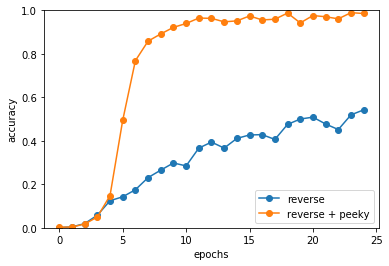

In [41]:
# グラフの描画
z = np.arange(len(z_acc_list))
# plt.plot(x, acc_list, marker='o', label='baseline')
plt.plot(y, y_acc_list, marker='o', label='reverse')
plt.plot(z, z_acc_list, marker='o', label='reverse + peeky')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend()
plt.show()

かなりうまく学習できていることが確認できました。  
次はさらにAttentionという改良を加えてモデルを強化していきます。